# Bike Sharing Assignment (Done By Shubhranshu Shekhar Patel)
## Problem Statement :
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Reading and analyzing the Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#pd.set_option('display.max_rows',1000)

In [3]:
# Reading the data set
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.shape

(730, 16)

#### Inferences :
1. There are 730 rows and 16 columns.
2. All columns are integer of float type except dte day.
3. some columns may not be needed and can be deleted such as instant(as it is a index only), casual,registered(as we are interested in count , both these columns are not needed.)
4. Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.



### Data Quality Check

#### Missing values and duplicates

In [7]:
# checking for missing values columns
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# null values in each row
bike.isnull().sum(axis =1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [9]:
# checking for duplicates
bike1 = bike.copy()
bike1.drop_duplicates(inplace = True)
print(bike1.shape)
print(bike.shape)

(730, 16)
(730, 16)


#### Inferences :
1. No null values are present in either any columns or rows.
2. Since we created a copy and deleted all duplicates after that also since the shape of both are same we can conclude that there are no duplicates.

### Data Cleaning

In [10]:
#checking for value counts
for col in bike:
    print(bike[col].value_counts(ascending = False))

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
10-05-2019    1
07-06-2019    1
01-09-2018    1
19-08-2018    1
06-02-2018    1
             ..
31-10-2019    1
08-06-2018    1
16-11-2019    1
05-04-2018    1
21-06-2019    1
Name: dteday, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     

### Removing Unwanted columns

#### After looking at  the data and the data dictionary, the following variables can be removed from further analysis:

1. instant : Its only an index value

2. dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

4. We will save the new dataframe as bike_n, so that the original dataset is preserved for any future analysis/validation

In [11]:
# ckecking the columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# Deleting the unwanted columns
bike_n = bike.drop(['instant','dteday','casual','registered'],axis =1)

In [13]:
bike_n.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
bike_n.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Dealing with categorical variables and creating dummy variables

In [15]:
# checking for categorical
for col in bike_n:
    print(bike_n[col].value_counts(ascending= False))

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64
32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64
61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.041

#### From the above value counts we may infer
1. yr,holiday,workingday are binary categorical variables.
2. season, mnth, weekday, weathersit are categorical variable(ordinal).
3. Rest are continuous variable
4. from the data set characterestics the yr value 0 is for 2018 and 1 is for 2019.

In [16]:
bike_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [17]:
# converting the categorical data into categorical type
bike_n['season']=bike_n['season'].astype('category')
bike_n['mnth']=bike_n['mnth'].astype('category')
bike_n['weekday']=bike_n['weekday'].astype('category')
bike_n['weathersit']=bike_n['weathersit'].astype('category')

In [18]:
# Rechecking the data types
bike_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [19]:
# Creating dummy variables for category data type.
bike_n = pd.get_dummies(bike_n , drop_first = True)

In [20]:
bike_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [21]:
bike_n.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.143836,0.142466,0.142466,0.142466,0.142466,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.351164,0.349767,0.349767,0.349767,0.349767,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
bike_n.shape

(730, 30)

### Exploratory Data Analysis (EDA)

#### Numeric variable

In [23]:
# creating a list of numeric variable
num_var = ['temp','atemp','hum','windspeed','cnt']

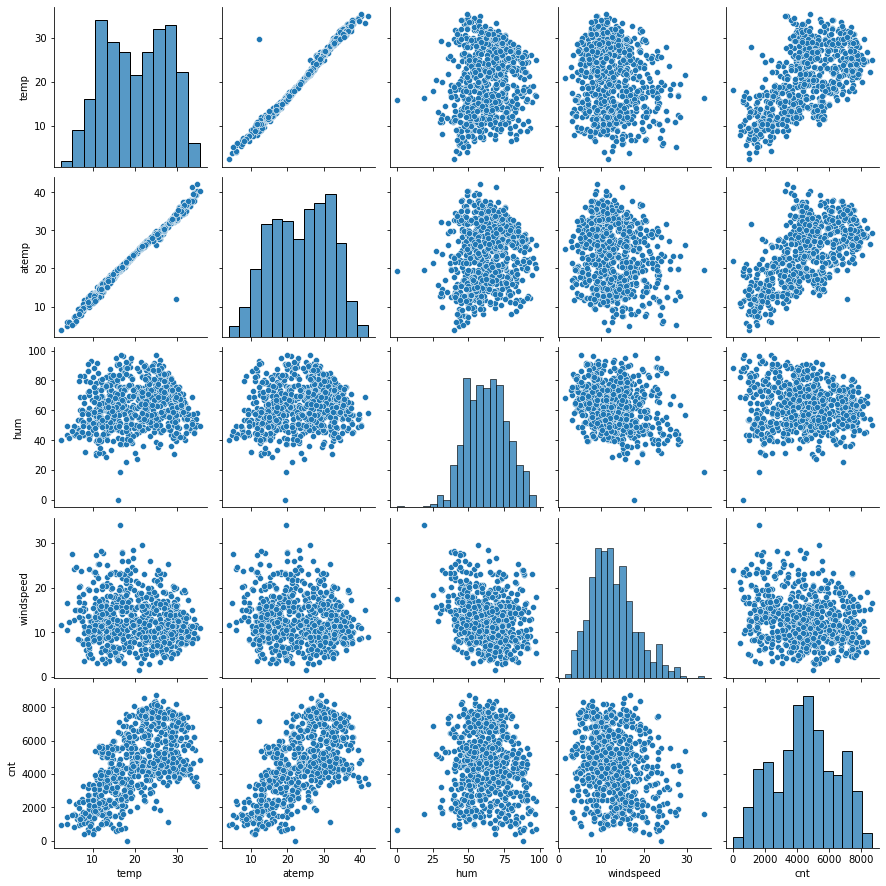

In [24]:
# plotting pair plot of num_var
sns.pairplot(bike_n[num_var])
plt.show()

#### Inference :
1. From the above pair plots we can say that there may be a little linear relationship between cnt and temp.
2. There in a high linear relationship between temp and atemp.

#### Categorical variables

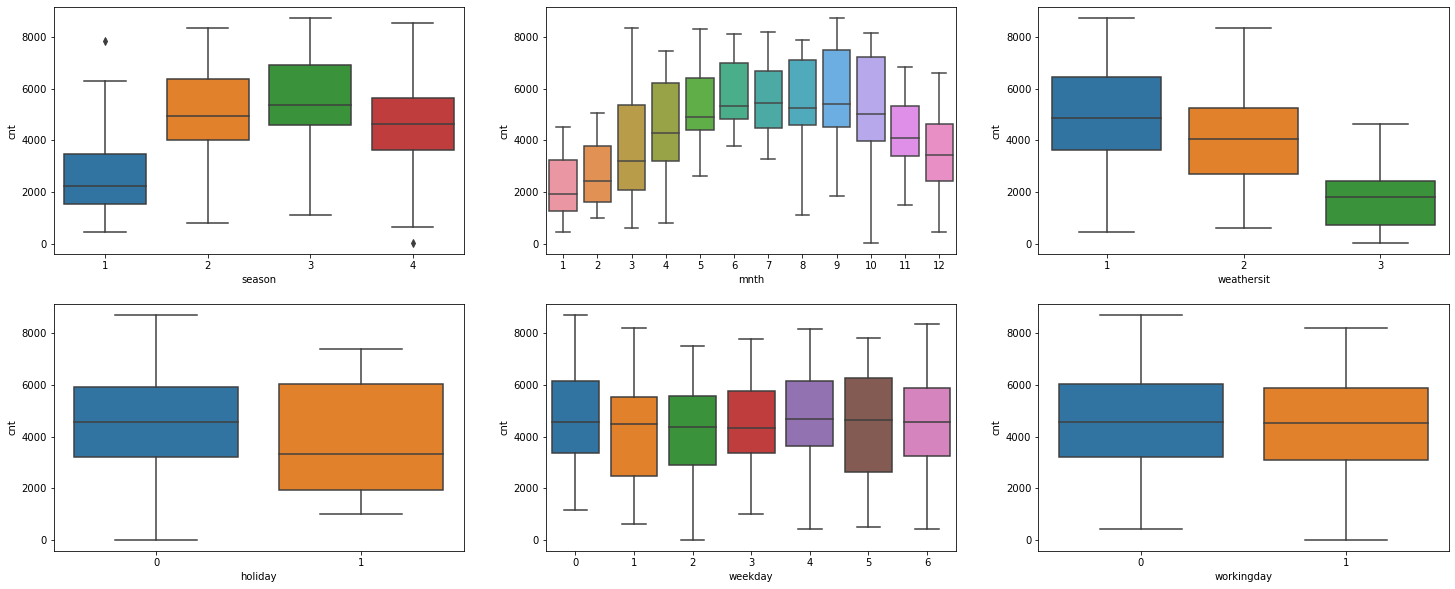

In [25]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### Inferences:
-  **Season** :
 The bike booking is highest during season 2 and 3 (2:summer, 3:fall).So trend is there in season.
-  **Month** :
 The bike booking is lowest during the month 1,2,12(January,February ,December), and highest during month 4 to 10 (April to October).So there is some trend in month.
-  **Weather situation** :
 In weathersit 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) weather the bike booking is high with a median value of approx 5000, and for weathersit 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) it decreases to around median value of 4000 and for median weathersit 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) it again decreases to a median value of around 2000. It shows a good trend.
-  **Holiday** :
 The median value for bike booking if its not a holiday is high as compared on holiday, but overall its same so it does not show a good trend.
-  **Weekday and Workingday** :
 For weekday and working day the bike booking is almost same so does not show a good trend.

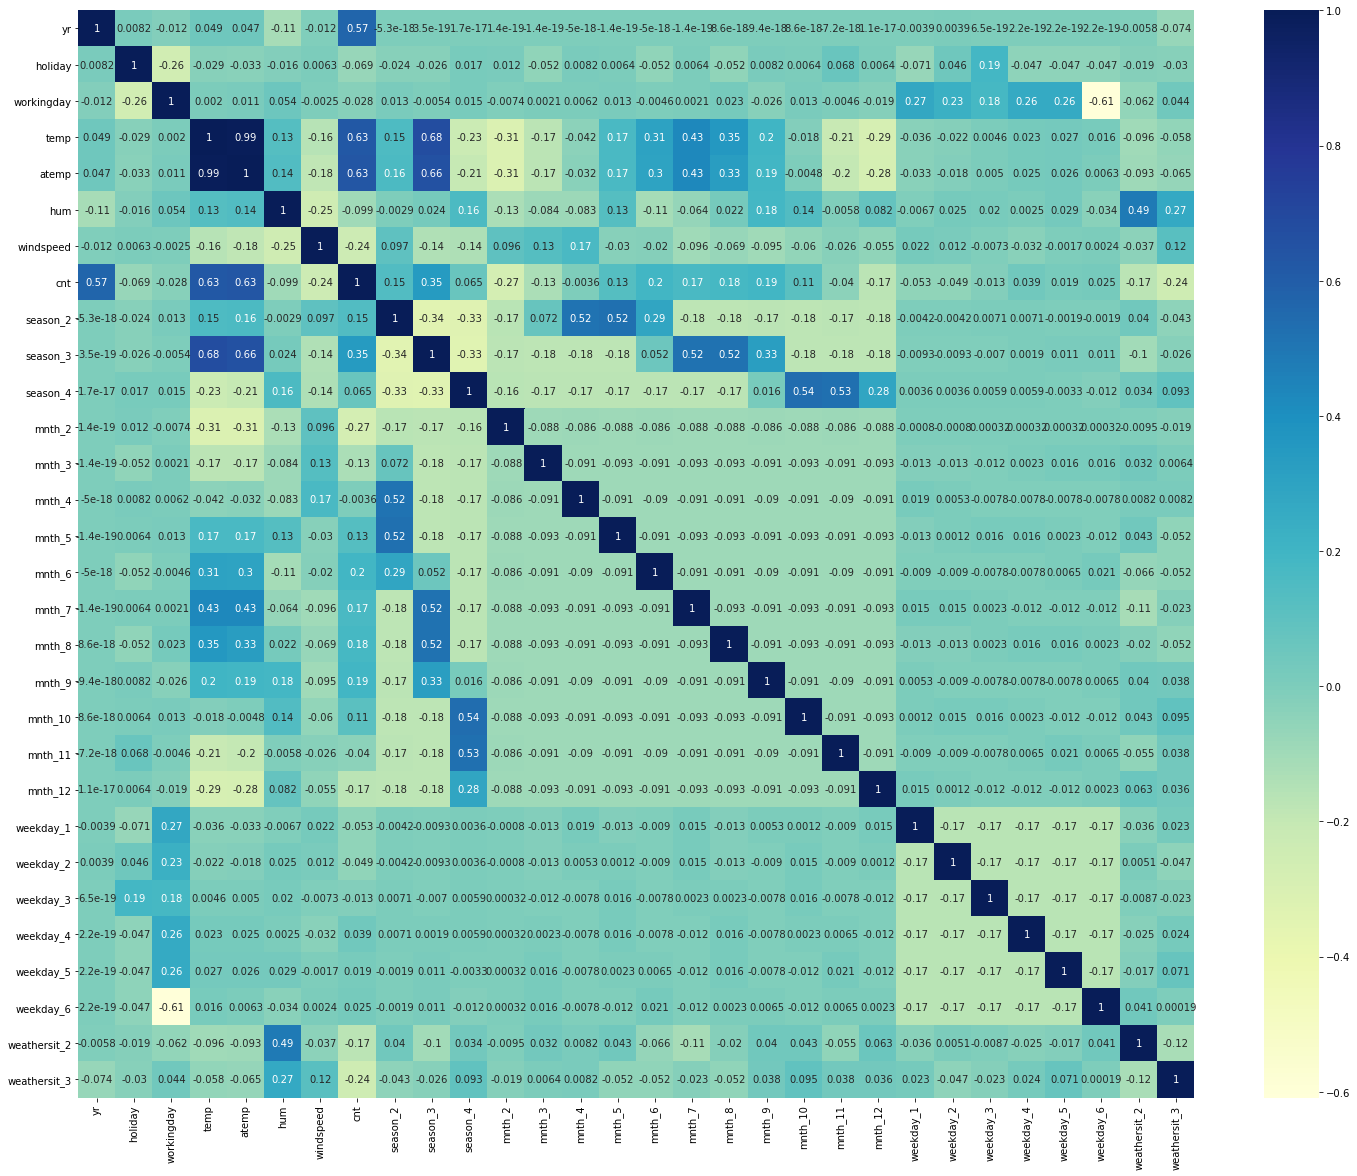

In [26]:
# Correlation Matrix
plt.figure(figsize = (25,20))
sns.heatmap(bike_n.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Insights :
1. We can see the multi collinearity .
2. We can see high correlation between temp and atemp.
3. There is also high correlation between cnt and temp , cnt and atemp, cnt and season_4, cnt and yr.

### Training the Model

#### Splitting the data into Training and Testing data

In [27]:
#Importing library and divide the data into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(bike_n,train_size =0.70,test_size =0.30,random_state =100)

In [28]:
df_train.shape

(510, 30)

In [29]:
df_test.shape

(219, 30)

In [30]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Rescaling the features (using MinMaxScaling)


In [31]:
# import libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
# applying Scaling to only numeric columns of df_train (Training dtaset)
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Inference:
Wecan see from the above that min-max scaling has been applied to all the numeric columns (max =1, min = 0)

### Building Linear Model

In [34]:
# creating X_train and y_train for modelling for
y_train = df_train.pop('cnt')
X_train = df_train

### RFE

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
#running RFE with outputnumber of variables equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Model :1

#### Using statsmodels for knowing p values

In [41]:
# Importing library
import statsmodels.api as sm

In [42]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.params)
print(lr1.summary())

const           0.237574
yr              0.230385
holiday        -0.089060
temp            0.484667
hum            -0.178353
windspeed      -0.183595
season_2        0.115215
season_3        0.043588
season_4        0.153434
mnth_3          0.033322
mnth_5          0.030660
mnth_8          0.051139
mnth_9          0.120896
mnth_10         0.043662
weathersit_2   -0.055804
weathersit_3   -0.244542
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          2.95e-189
Time:                        21:24:27   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                   

#### VIF check

In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
6,season_3,8.80
4,windspeed,3.80
5,season_2,3.73
7,season_4,3.13
13,weathersit_2,2.15
0,yr,2.04
10,mnth_8,1.85
9,mnth_5,1.68


#### since mnth_5 has p value 0.087 higher than 0.05 it is to be removed first

#### Model : 2

In [44]:
# removing mnth 5
X_train_new = X_train_rfe.drop(["mnth_5"], axis = 1)

In [45]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

#### Using statsmodels for knowing p values

In [46]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.params)
print(lr2.summary())

const           0.232054
yr              0.229702
holiday        -0.090301
temp            0.495171
hum            -0.170179
windspeed      -0.185711
season_2        0.121713
season_3        0.036642
season_4        0.150362
mnth_3          0.028540
mnth_8          0.050642
mnth_9          0.120374
mnth_10         0.042113
weathersit_2   -0.055934
weathersit_3   -0.246698
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          9.02e-190
Time:                        21:24:27   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:             

#### VIF check

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.01
3,hum,15.51
6,season_3,8.53
4,windspeed,3.73
5,season_2,3.51
7,season_4,3.07
12,weathersit_2,2.15
0,yr,2.03
9,mnth_8,1.85
11,mnth_10,1.64


#### since season_3 has p value 0.106 higher than 0.05 it is to be removed 

#### Model : 3

In [48]:
# removing season_3
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [49]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

#### Using statsmodels for knowing p values

In [50]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.params)
print(lr3.summary())

const           0.232420
yr              0.228609
holiday        -0.091995
temp            0.536385
hum            -0.178989
windspeed      -0.189298
season_2        0.104860
season_4        0.139327
mnth_3          0.023825
mnth_8          0.060819
mnth_9          0.129567
mnth_10         0.038297
weathersit_2   -0.054751
weathersit_3   -0.241787
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          2.26e-190
Time:                        21:24:28   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df 

#### VIF check

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
6,season_4,2.34
11,weathersit_2,2.14
0,yr,2.02
5,season_2,1.83
8,mnth_8,1.61
10,mnth_10,1.61
9,mnth_9,1.34


#### since mnth_3 has p value 0.093 higher than 0.05 it is to be removed 

#### Model : 4

In [52]:
# removing mnth_3
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [53]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Using statsmodels for knowing p values

In [54]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.params)
print(lr4.summary())

const           0.239025
yr              0.228792
holiday        -0.094454
temp            0.530755
hum            -0.180323
windspeed      -0.186767
season_2        0.104803
season_4        0.135266
mnth_8          0.058821
mnth_9          0.127988
mnth_10         0.038612
weathersit_2   -0.054608
weathersit_3   -0.240121
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          6.02e-191
Time:                        21:24:28   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                   

#### VIF check

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,season_4,2.27
10,weathersit_2,2.13
0,yr,2.02
5,season_2,1.83
9,mnth_10,1.61
7,mnth_8,1.60
8,mnth_9,1.34


#### since all have p value less than 0.05 but hum has higher VIF then 10 we will remove hum

#### Model : 5

In [56]:
# removing hum
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [57]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Using statsmodels for knowing p values

In [58]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.params)
print(lr5.summary())

const           0.135532
yr              0.232775
holiday        -0.095944
temp            0.509119
windspeed      -0.151914
season_2        0.101534
season_4        0.126632
mnth_8          0.057223
mnth_9          0.121148
mnth_10         0.034188
weathersit_2   -0.083372
weathersit_3   -0.288317
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          3.21e-187
Time:                        21:24:29   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                

#### VIF check

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.95
4,season_2,1.82
8,mnth_10,1.60
6,mnth_8,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.09


#### since mnth_10 has p value 0.054 higher than 0.05 it is to be removed 

#### Model : 6

In [60]:
# removing mnth_10
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [61]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Using statsmodels for knowing p values

In [62]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.params)
print(lr6.summary())

const           0.131241
yr              0.232489
holiday        -0.097109
temp            0.517361
windspeed      -0.149737
season_2        0.099972
season_4        0.138343
mnth_8          0.054165
mnth_9          0.116177
weathersit_2   -0.082534
weathersit_3   -0.282834
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          1.26e-187
Time:                        21:24:29   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         

#### VIF check

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.81
6,mnth_8,1.58
5,season_4,1.49
8,weathersit_2,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


#### we can remove mnth_8 as it has a bit high correlation between mnth_8 and temp which can be seen from the heat map to decrease the VIF value of temp

#### Model: 7

In [64]:
# removing mnth_8
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)

In [65]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_9',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Using statsmodels for knowing p values

In [66]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()
print(lr7.params)
print(lr7.summary())

const           0.126436
yr              0.232786
holiday        -0.099211
temp            0.548046
windspeed      -0.153276
season_2        0.086848
season_4        0.130574
mnth_9          0.101076
weathersit_2   -0.079747
weathersit_3   -0.283837
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          1.37e-186
Time:                        21:24:29   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:        

#### VIF check

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,season_2,1.56
7,weathersit_2,1.48
5,season_4,1.38
6,mnth_9,1.20
8,weathersit_3,1.08
1,holiday,1.03


#### Inference : 
-  This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Model Interpretation :

#### Hypothesis Testing:
Hypothesis testing states that:

-  **H0:**B1=B2=...=Bn=0
-  **H1:** at least one Bi!=0

#### lr7(Final Model) Coefficient values
    const           0.126436
    yr              0.232786
    holiday        -0.099211
    temp            0.548046
    windspeed      -0.153276
    season_2        0.086848
    season_4        0.130574
    mnth_9          0.101076
    weathersit_2   -0.079747
    weathersit_3   -0.283837
since none of the coefficients are equal to zero we reject the null hypothesis

#### Statistics 
-  Rsquared and Adjusted Rsquared have values (0.831 and 0.828) we can say its a good value.
-  F statistic value is 272.9 which is high enough for a good model.
-  Since all the variables have VIF value less than 5 we can say they have very less multicollinearity.
-  Since all have p values equal to 0(less than 0.05) all the variables are significant.


#### Equation of best fit
cnt = 0.126436 + (yr * 0.232786) - (holiday * 0.099211) + (temp * 0.548046) - (windspeed * 0.153276) + (season_2 *   0.086848) + (season_4 * 0.130574) + (mnth_9 * 0.101076) - (weathersit_2 * 0.079747) - (weathersit_3 * 0.283837)

## Residual analysis of Training data

In [68]:
# prediting the data for X_train_lm7 in our final model lr7
y_train_pred = lr7.predict(X_train_lm7)

In [69]:
# calculating the residue
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

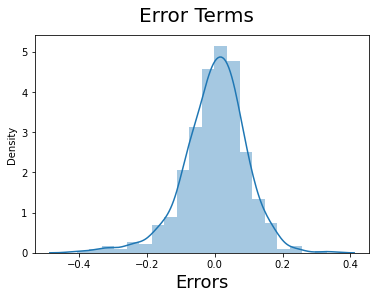

In [70]:
# checking for assumption(res following a normal distribution)
plt.figure()
sns.distplot(res,bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

#### Inference :
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

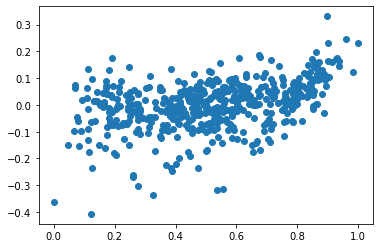

In [71]:
# checking if the error are independent or not
plt.scatter(y_train,res)
plt.show()

#### From the above scatter plot we can see no trend follows between the point hense the residue are independent

## Making Predictions on Test set using final model (lr7) :


In [72]:
# Applying the scaling on the test set:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
# Dividing into X and y test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
X_test.head()

,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_2,weathersit_3
184,0,1,0.831783,0.084219,0,0,0,1,0
535,1,0,0.901354,0.153728,1,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0
152,0,0,0.817246,0.537414,1,0,0,0,0


In [75]:
# Adding constant
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.head()

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_2,weathersit_3
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [76]:
# making predictions using final model
y_test_pred = lr7.predict(X_test_lm7)

## Model Evaluation:


In [77]:
# import library and computing rsquared values for train and test
from sklearn.metrics import r2_score

print('r2_score for train data :',r2_score(y_true = y_train, y_pred = y_train_pred))
print('r2_score for test data :',r2_score(y_true = y_test, y_pred = y_test_pred))

r2_score for train data : 0.8308378040041673
r2_score for test data : 0.7938290016640651


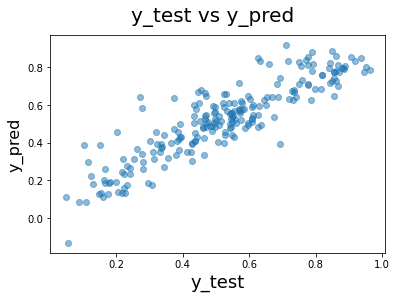

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### Inference :
- Since the rsquared values for both the test data set and train data set is similar or close we can say that our Linear Regression Model is good.

### As per our final Model, the top 3 predictor variables that influences the bike booking are:

- **Temperature (temp)** - A coefficient value of ‘0.548046’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.548046 units.
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.283837’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.283837 units.
- **Year (yr)** - A coefficient value of ‘0.232786’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.232786 units.

So these three variables are very important for our booking.

**The next best features that can also be considered are**

- **season_4** - A coefficient value of ‘0.130574’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.130574 units.
- **windspeed** - A coefficient value of ‘-0.153276’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.153276 units.

**Note**
The details of weathersit_1 & weathersit_3
- **weathersit_2:** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

The details of season1 & season4
- **season2:** summer
- **season4:** winter

